In [1]:
import sys
import os

# Add the src directory to Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(src_path)
from datetime import datetime
from UmAI.imports import *

from UmAI.hssm_model_helper_functions import *
from UmAI.landscaping import *


# Default datasets

Default datasets are datasets that are generated with the parameter values sampled from prior distributions stated in HSSM. 

- Number of datasets: 50
- Number of trials in each dataset: 100

These models will sample new parameter values for each dataset. These default datasets are going to be used in:

(1) Landscaping analysis

(2) Representativeness analysis

(3) To compare to some experimental conditions for design distinguishability

## Default dataset for DDM


In [2]:
datasets_default_ddm = []

for i in range(50):
    params = model_parameter_sampler(model='ddm')

    dataset = hssm.simulate_data(model='ddm',theta=params, size=100)
    datasets_default_ddm.append(dataset)

## Default dataset for Angle

In [3]:
datasets_default_angle = []

for i in range(50):
    params = model_parameter_sampler(model='angle')

    dataset = hssm.simulate_data(model='angle',theta=params, size=100)
    datasets_default_angle.append(dataset)

## Fit both models to the default datasets

All model parameters are free to see how the models mimic each other. This is for the initial landscaping analysis. The fits are stored for possible landscape analyses. 

In [ ]:
print('#########################')
print('----------- ANGLE / DDM -----------')
print('#########################')

print('Fitting DDM')
default_ddm_ddm_fits = store_model_fits(model_type='ddm', datasets=datasets_default_ddm)
print('Fitting Angle')
default_ddm_angle_fits = store_model_fits(model_type='angle', datasets=datasets_default_ddm)

print('#########################')
print('----------- DDM / ANGLE -----------')
print('#########################')



print('Fitting DDM')
default_angle_ddm_fits = store_model_fits(model_type='ddm', datasets=datasets_default_angle)
print('Fitting Angle')
default_angle_angle_fits = store_model_fits(model_type='angle', datasets=datasets_default_angle)


In [5]:
# Calculate the ML for each dataset in the model fits

## Angle / DDM
default_ddm_ddm_perf = dataset_sum_loglikelihood(default_ddm_ddm_fits)
default_ddm_angle_perf = dataset_sum_loglikelihood(default_ddm_angle_fits)

## DDM / Angle
default_angle_ddm_perf = dataset_sum_loglikelihood(default_angle_ddm_fits)
default_angle_angle_perf = dataset_sum_loglikelihood(default_angle_angle_fits)


NameError: name 'model_fits_1' is not defined

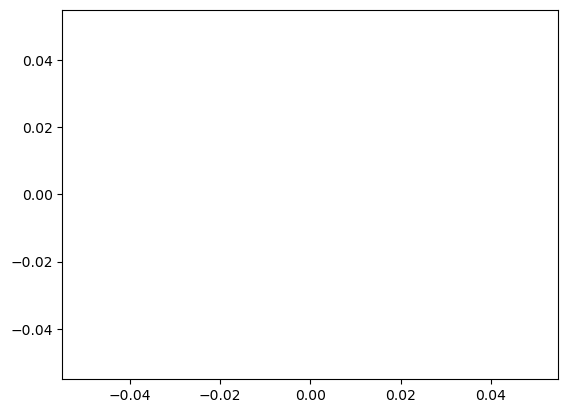

In [ ]:
# Landscape Analyses - Initial, no plotting

landscape_default_ddm_angle = landscape_analysis(default_ddm_ddm_perf, default_ddm_angle_perf)
landscape_default_angle_ddm = landscape_analysis(default_angle_angle_perf, default_angle_ddm_perf)
# Clean the outliers

landscape_default_ddm_angle = remove_outliers_two_sided(landscape_default_ddm_angle, lower=5, upper=95)
landscape_default_angle_ddm = remove_outliers_two_sided(landscape_default_angle_ddm , lower=5, upper=95)



### (Replacement Funtion to plot landscapes)

In [7]:
def plot_landscape2(landscape):

    plt.plot()
    # Plot the criterion line (x=y)
    line_begin = np.min([np.min(landscape['model1']['model_sum_ll']), np.min(landscape['model2']['model_sum_ll'])])
    line_end = np.max([np.max(landscape['model1']['model_sum_ll']), np.max(landscape['model2']['model_sum_ll'])])
    plt.plot([line_begin, line_end], [line_begin, line_end], 'k--')

    # Scatter the dots

    plt.plot(landscape['model1']['model_sum_ll'], landscape['model2']['model_sum_ll'], 'bo')

    # Axis labels
    plt.xlabel(landscape['model1']['model_type'])
    plt.ylabel(landscape['model2']['model_type'])

    # Title
    plt.title(f"Landscape: {landscape['model2']['model_type']} / {landscape['model1']['model_type']}")



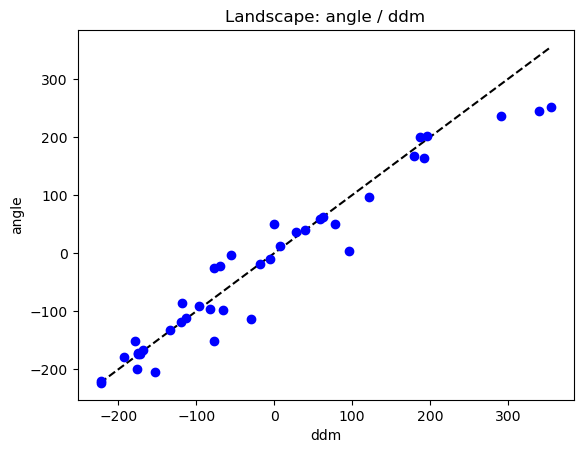

In [9]:
# Plot the landscape

plot_landscape2(landscape_default_ddm_angle)



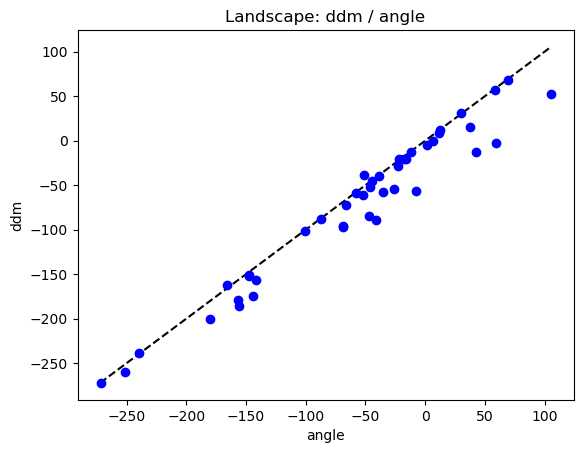

In [10]:
plot_landscape2(landscape_default_angle_ddm)

At this point, we don't need the representativeness analysis. Proceeding witht the experimental designs. 

----

# Experimental Design 1 - Increased N

Experiment 1 investigates the effect of sample size on model distinguishability.
In this experimental condition, each model will generate 100 datasets with 100 trials in each. 

This will be compared to (1) Default (*N = 50*) and (2) Experimental Design 2 (*N = 20*).



In [14]:
datasets_exp1_ddm = []

for i in range(100):
    params = model_parameter_sampler(model='ddm')

    dataset = hssm.simulate_data(model='ddm',theta=params, size=100)
    datasets_exp1_ddm.append(dataset)

datasets_exp1_angle = []

for i in range(100):
    params = model_parameter_sampler(model='angle')

    dataset = hssm.simulate_data(model='angle',theta=params, size=100)
    datasets_exp1_angle.append(dataset)

## Fit models to experimental design

In [ ]:
print('#########################')
print('----------- ANGLE / DDM -----------')
print('#########################')

print('Fitting DDM')
exp1_ddm_ddm_fits = store_model_fits(model_type='ddm', datasets=datasets_exp1_ddm)
print('Fitting Angle')
exp1_ddm_angle_fits = store_model_fits(model_type='angle', datasets=datasets_exp1_ddm)




In [ ]:
print('#########################')
print('----------- DDM / ANGLE -----------')
print('#########################')


print('Fitting DDM')
exp1_angle_ddm_fits = store_model_fits(model_type='ddm', datasets=datasets_exp1_angle)
print('Fitting Angle')
exp1_angle_angle_fits = store_model_fits(model_type='angle', datasets=datasets_exp1_angle)

## Landscapes

In [17]:
# Calculate the ML for each dataset in the model fits

## Angle / DDM
exp1_ddm_ddm_perf = dataset_sum_loglikelihood(exp1_ddm_ddm_fits)
exp1_ddm_angle_perf = dataset_sum_loglikelihood(exp1_ddm_angle_fits)

## DDM / Angle
exp1_angle_ddm_perf = dataset_sum_loglikelihood(exp1_angle_ddm_fits)
exp1_angle_angle_perf = dataset_sum_loglikelihood(exp1_angle_angle_fits)


In [18]:
# Landscape Analyses - Initial, no plotting

landscape_exp1_ddm_angle = landscape_analysis(exp1_ddm_ddm_perf, exp1_ddm_angle_perf)
landscape_exp1_angle_ddm = landscape_analysis(exp1_angle_angle_perf, exp1_angle_ddm_perf)
# Clean the outliers

landscape_exp1_ddm_angle = remove_outliers_two_sided(landscape_exp1_ddm_angle, lower=5, upper=95)
landscape_exp1_angle_ddm = remove_outliers_two_sided(landscape_exp1_angle_ddm , lower=5, upper=95)



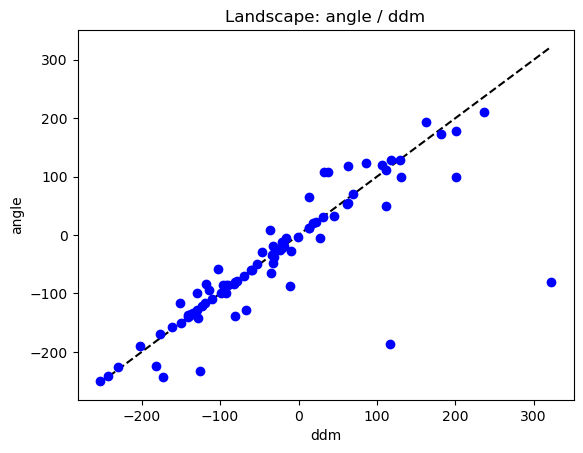

In [19]:
plot_landscape2(landscape_exp1_ddm_angle)

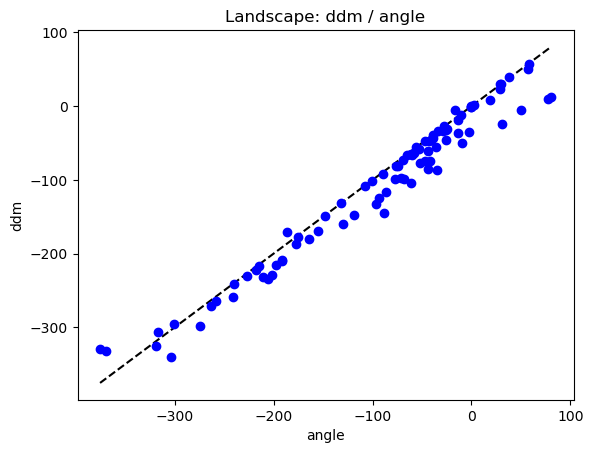

In [20]:
plot_landscape2(landscape_exp1_angle_ddm)

# Experimental Design 2 - Decreased N

Experiment 1 investigates the effect of sample size on model distinguishability.
In this experimental condition, each model will generate 200 datasets with 100 trials in each. 

This will be compared to (1) Default (*N = 50*) and (2) Experimental Design 1 (*N = 100*).



In [11]:
datasets_exp2_ddm = []

for i in range(20):
    params = model_parameter_sampler(model='ddm')

    dataset = hssm.simulate_data(model='ddm',theta=params, size=100)
    datasets_exp2_ddm.append(dataset)

datasets_exp2_angle = []

for i in range(20):
    params = model_parameter_sampler(model='angle')

    dataset = hssm.simulate_data(model='angle',theta=params, size=100)
    datasets_exp2_angle.append(dataset)

## Fit models to experimental design

In [ ]:
print('#########################')
print('----------- ANGLE / DDM -----------')
print('#########################')

print('Fitting DDM')
exp2_ddm_ddm_fits = store_model_fits(model_type='ddm', datasets=datasets_exp2_ddm)
print('Fitting Angle')
exp2_ddm_angle_fits = store_model_fits(model_type='angle', datasets=datasets_exp2_ddm)

print('#########################')
print('----------- DDM / ANGLE -----------')
print('#########################')



print('Fitting DDM')
exp2_angle_ddm_fits = store_model_fits(model_type='ddm', datasets=datasets_exp2_angle)
print('Fitting Angle')
exp2_angle_angle_fits = store_model_fits(model_type='angle', datasets=datasets_exp2_angle)


## Landscapes

In [21]:
# Calculate the ML for each dataset in the model fits

## Angle / DDM
exp2_ddm_ddm_perf = dataset_sum_loglikelihood(exp2_ddm_ddm_fits)
exp2_ddm_angle_perf = dataset_sum_loglikelihood(exp2_ddm_angle_fits)

## DDM / Angle
exp2_angle_ddm_perf = dataset_sum_loglikelihood(exp2_angle_ddm_fits)
exp2_angle_angle_perf = dataset_sum_loglikelihood(exp2_angle_angle_fits)


In [22]:
# Landscape Analyses - Initial, no plotting

landscape_exp2_ddm_angle = landscape_analysis(exp2_ddm_ddm_perf, exp2_ddm_angle_perf)
landscape_exp2_angle_ddm = landscape_analysis(exp2_angle_angle_perf, exp2_angle_ddm_perf)
# Clean the outliers

landscape_exp2_ddm_angle = remove_outliers_two_sided(landscape_exp2_ddm_angle, lower=5, upper=95)
landscape_exp2_angle_ddm = remove_outliers_two_sided(landscape_exp2_angle_ddm , lower=5, upper=95)



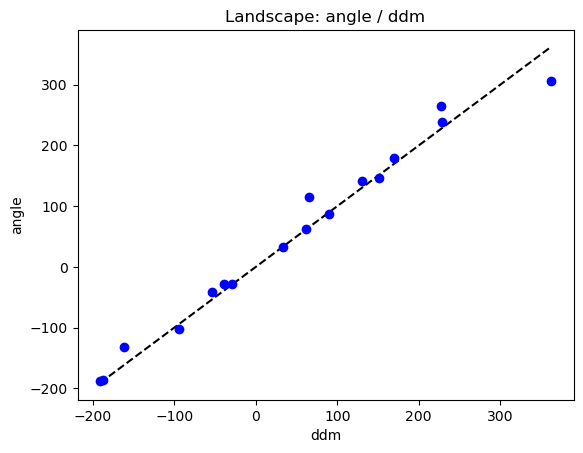

In [23]:
plot_landscape2(landscape_exp2_ddm_angle)

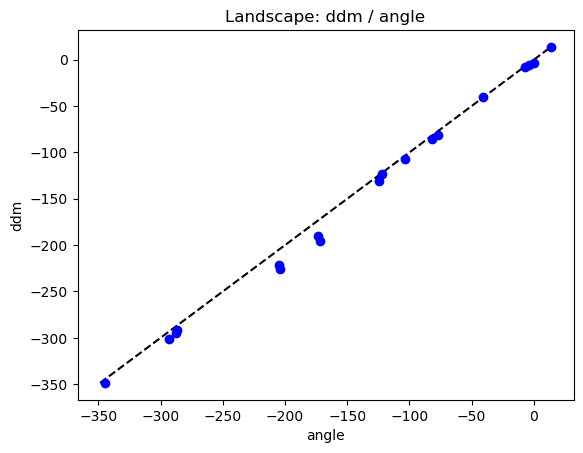

In [24]:
plot_landscape2(landscape_exp2_angle_ddm)

# Distinguishability as a function of expeirmental design

Calculate the landscape scores (log-odds)

In [25]:
landscape_default_ddm_angle = landscape_score(landscape_default_ddm_angle)
landscape_default_angle_ddm = landscape_score(landscape_default_angle_ddm)

landscape_exp1_ddm_angle = landscape_score(landscape_exp1_ddm_angle)
landscape_exp1_angle_ddm = landscape_score(landscape_exp1_angle_ddm)

landscape_exp2_ddm_angle = landscape_score(landscape_exp2_ddm_angle)
landscape_exp2_angle_ddm = landscape_score(landscape_exp2_angle_ddm)

Plot the landscape scores 

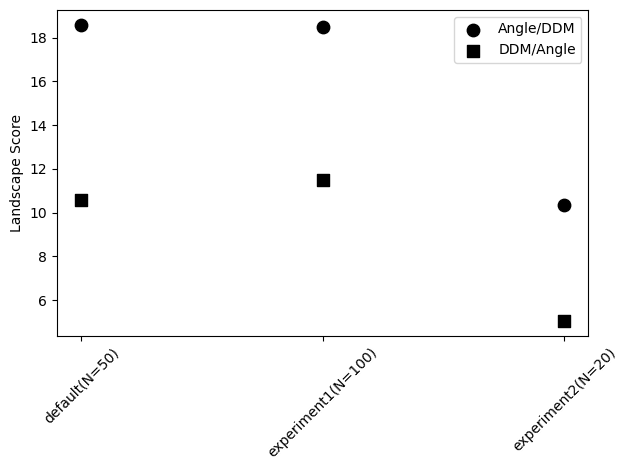

In [29]:
default_ls_scores = [landscape_default_ddm_angle['landscape_score'], landscape_default_angle_ddm['landscape_score']]
exp1_ls_scores = [landscape_exp1_ddm_angle['landscape_score'], landscape_exp1_angle_ddm['landscape_score']]
exp2_ls_scores = [landscape_exp2_ddm_angle['landscape_score'], landscape_exp2_angle_ddm['landscape_score']]


designs = ['default(N=50)', 'experiment1(N=100)', 'experiment2(N=20)']
data = [default_ls_scores, exp1_ls_scores, exp2_ls_scores]
markers = ['o', 's']
labels = ['Angle/DDM', 'DDM/Angle']

x = np.arange(len(designs))

for j in range(len(labels)):
    y = [data[i][j] for i in range(len(data))]
    plt.scatter(x,y, marker=markers[j], s=80, label=labels[j], color='k' )

plt.xticks(x, designs, rotation=45)
plt.ylabel('Landscape Score')
plt.legend()
plt.tight_layout()
plt.show()


# Brief report on distinguishability

The default design and the experiment 1 are close to each other in their respective landscape scores, whereas the experiment 2 - with decreased participants - has also a decreased landscape score, meaning less distinguishability. The landscapes Angle/DDM always scored higher, indicating that Angle can fit to DDM data compared to DDM fitting to Angle data. 

This graph shows us that the increased number of participants can increase the distinguishability, however, there is not much difference from 50 participants to 100 participants.

We conclude that in the default parameter sampling settings, the number of participants can be around 50 to have similar results to the case where there are 100 participants. 

Further simulations to conduct to find a spot between 20 to 50 participants, as well as other design conditions where the threshold and conherence levels change. 